<a href="https://colab.research.google.com/github/sreenesh-reddy/Infosys-Springboard-Internship/blob/main/Lesnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =====================
# Importing Libraries
# =====================

# Imports PyTorch library for building and training the neural network.
import torch

# Imports the neural network module (nn) for creating layers and models.
import torch.nn as nn

# Imports optimizers for training the model.
import torch.optim as optim

# Imports `datasets` for loading prebuilt datasets, and `transforms` for data preprocessing.
from torchvision import datasets, transforms

# Imports `DataLoader` for managing batches of data during training and testing.
from torch.utils.data import DataLoader

# Imports Matplotlib for plotting graphs and visualizing data.
import matplotlib.pyplot as plt

# Imports Scikit-learn tools for generating a confusion matrix and classification report.
from sklearn.metrics import confusion_matrix, classification_report

# Imports Seaborn for better visualization of data using heatmaps.
import seaborn as sns

In [ ]:

# =====================
# Checking for GPU
# =====================

# Defines the device (GPU if available, otherwise CPU) for running the model.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prints the device being used.
print(f"Using device: {device}")

Using device: cpu


In [ ]:

# =====================
# Data Preprocessing
# =====================

# Defines transformations for training data:
# 1. Randomly flips images horizontally.
# 2. Randomly crops images with padding of 4 pixels.
# 3. Converts images to tensors.
# 4. Normalizes pixel values to have a mean of 0.5 and standard deviation of 0.5.
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Defines transformations for test data:
# 1. Converts images to tensors.
# 2. Normalizes pixel values to the same mean and standard deviation as training data.
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loads the CIFAR-10 dataset for training with specified transformations. Downloads it if not available.
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)

# Loads the CIFAR-10 dataset for testing with specified transformations.
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

# Defines the DataLoader for training data with a batch size of 64 and random shuffling for better learning.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Defines the DataLoader for testing data with a batch size of 64 without shuffling.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:02<00:00, 61.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:

# =====================
# LeNet Model Definition
# =====================

# Defines the LeNet model structure by extending `nn.Module`.
class LeNet(nn.Module):
    def __init__(self):
        # Initializes the parent class.
        super(LeNet, self).__init__()

        # Defines the first convolutional layer (3 input channels, 6 output channels, 5x5 filter size).
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)

        # Defines an average pooling layer with a 2x2 filter and stride of 2.
        self.pool = nn.AvgPool2d(2, 2)

        # Defines the second convolutional layer (6 input channels, 16 output channels, 5x5 filter size).
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        # Defines the first fully connected layer (input size: 16 * 5 * 5, output size: 120).
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # Defines the second fully connected layer (input size: 120, output size: 84).
        self.fc2 = nn.Linear(120, 84)

        # Defines the final fully connected layer (input size: 84, output size: 10 for 10 classes).
        self.fc3 = nn.Linear(84, 10)

    # Defines the forward pass through the network.
    def forward(self, x):
        # Applies the first convolutional layer, followed by ReLU activation.
        x = torch.relu(self.conv1(x))

        # Applies average pooling.
        x = self.pool(x)

        # Applies the second convolutional layer, followed by ReLU activation.
        x = torch.relu(self.conv2(x))

        # Applies average pooling again.
        x = self.pool(x)

        # Flattens the 3D tensor into a 1D vector.
        x = x.view(-1, 16 * 5 * 5)

        # Applies the first fully connected layer, followed by ReLU activation.
        x = torch.relu(self.fc1(x))

        # Applies the second fully connected layer, followed by ReLU activation.
        x = torch.relu(self.fc2(x))

        # Applies the final fully connected layer for class predictions.
        x = self.fc3(x)

        # Returns the output of the network.
        return x

# Creates an instance of the LeNet model and moves it to the specified device (GPU or CPU).
model = LeNet().to(device)

Epoch 1/20, Training Loss: 1.0764, Test Loss: 1.0459
Epoch 2/20, Training Loss: 1.0662, Test Loss: 1.0418
Epoch 3/20, Training Loss: 1.0561, Test Loss: 1.0127
Epoch 4/20, Training Loss: 1.0463, Test Loss: 0.9938
Epoch 5/20, Training Loss: 1.0423, Test Loss: 0.9934
Epoch 6/20, Training Loss: 1.0274, Test Loss: 1.0086
Epoch 7/20, Training Loss: 1.0276, Test Loss: 0.9785
Epoch 8/20, Training Loss: 1.0171, Test Loss: 0.9687
Epoch 9/20, Training Loss: 1.0168, Test Loss: 0.9765
Epoch 10/20, Training Loss: 1.0135, Test Loss: 0.9612
Epoch 11/20, Training Loss: 1.0031, Test Loss: 0.9577
Epoch 12/20, Training Loss: 0.9991, Test Loss: 0.9556
Epoch 13/20, Training Loss: 0.9918, Test Loss: 0.9500
Epoch 14/20, Training Loss: 0.9873, Test Loss: 0.9396
Epoch 15/20, Training Loss: 0.9874, Test Loss: 0.9432
Epoch 16/20, Training Loss: 0.9824, Test Loss: 0.9191
Epoch 17/20, Training Loss: 0.9805, Test Loss: 0.9105
Epoch 18/20, Training Loss: 0.9738, Test Loss: 0.9319
Epoch 19/20, Training Loss: 0.9650, T

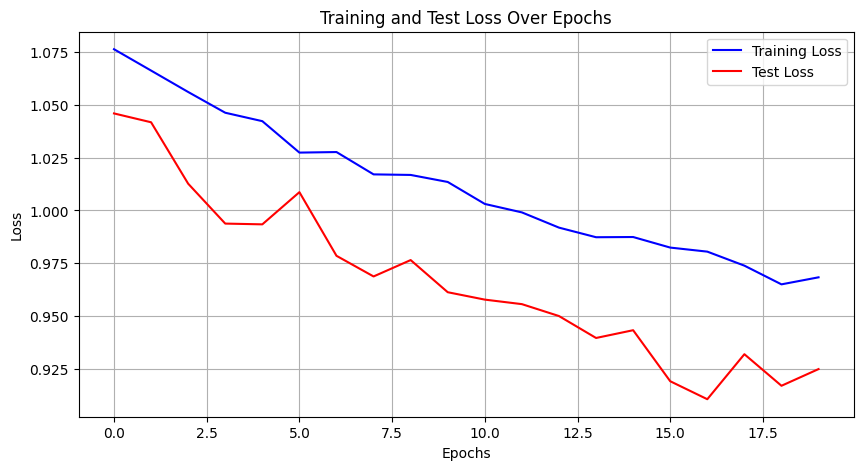

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# =====================
# Training Setup
# =====================

# Defines the loss function as cross-entropy loss, suitable for multi-class classification.
criterion = nn.CrossEntropyLoss()

# Defines the Adam optimizer with a learning rate of 0.001 for updating model parameters.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# =====================
# Training the Model
# =====================

# Specifies the number of epochs for training.
num_epochs = 20

# Initializes lists to track training and test losses over epochs.
train_losses = []
test_losses = []

# Loops through the specified number of epochs.
for epoch in range(num_epochs):
    # Puts the model in training mode.
    model.train()

    # Initializes the running loss for this epoch.
    running_loss = 0.0

    # Loops through batches of training data.
    for images, labels in train_loader:
        # Moves the images and labels to the specified device.
        images, labels = images.to(device), labels.to(device)

        # Resets the gradients to zero for each batch.
        optimizer.zero_grad()

        # Passes the images through the model to get predictions.
        outputs = model(images)

        # Calculates the loss between predictions and true labels.
        loss = criterion(outputs, labels)

        # Performs backpropagation to compute gradients.
        loss.backward()

        # Updates the model parameters using the optimizer.
        optimizer.step()

        # Adds the loss for this batch to the running loss.
        running_loss += loss.item()

    # Appends the average loss for this epoch to the training loss list.
    train_losses.append(running_loss / len(train_loader))

    # Calculate test loss at the end of each epoch
    model.eval()  # Set model to evaluation mode (no gradient calculation)
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradients needed for testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy (optional for plotting)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Appends the average test loss for this epoch to the test loss list.
    test_losses.append(test_loss / len(test_loader))

    # Prints the training and test loss for this epoch.
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss / len(train_loader):.4f}, Test Loss: {test_loss / len(test_loader):.4f}")

# =====================
# Plotting Loss Graphs
# =====================

# Plot training and test losses
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Training Loss', color='blue')
plt.plot(range(num_epochs), test_losses, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# =====================
# Evaluating the Model
# =====================

# Puts the model in evaluation mode.
model.eval()

# Initializes variables for accuracy calculation.
correct = 0
total = 0

# Initializes lists to store predictions and true labels.
predictions = []
true_labels = []

# Disables gradient computation for evaluation.
with torch.no_grad():
    # Loops through batches of test data.
    for images, labels in test_loader:
        # Moves the images and labels to the specified device.
        images, labels = images.to(device), labels.to(device)

        # Passes the images through the model to get predictions.
        outputs = model(images)

        # Gets the predicted class with the highest score for each image.
        _, predicted = torch.max(outputs.data, 1)

        # Updates the total number of labels.
        total += labels.size(0)

        # Counts the number of correct predictions.
        correct += (predicted == labels).sum().item()

        # Stores the predictions and true labels for confusion matrix generation.
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculates the overall accuracy on the test set.
accuracy = 100 * correct / total
print(f"Accuracy of the model on the test set: {accuracy:.2f}%")

Accuracy of the model on the test set: 67.85%


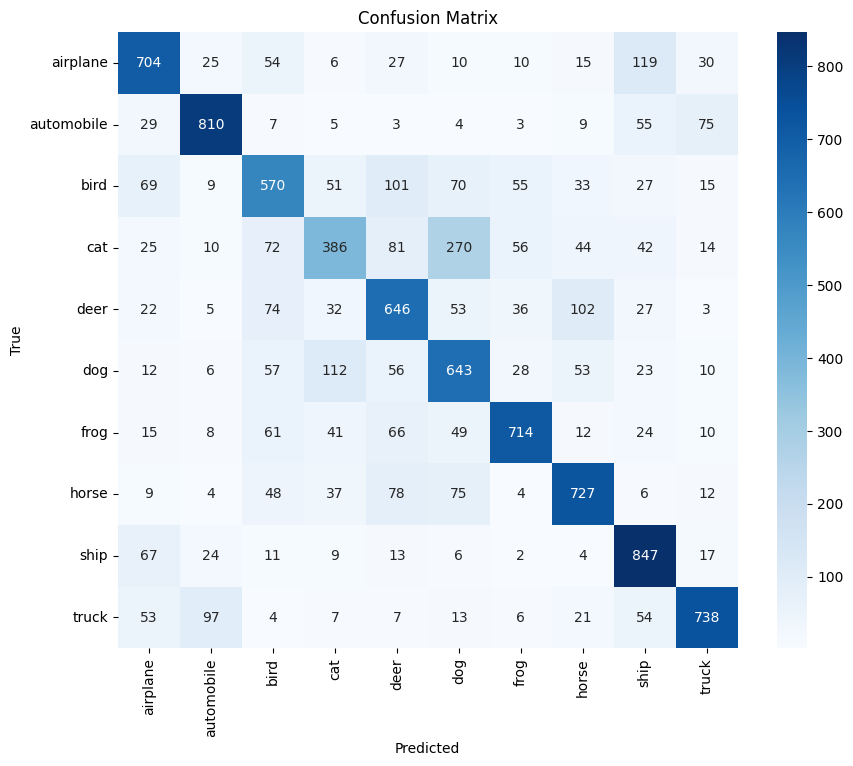

Classification Report:

              precision    recall  f1-score   support

    airplane       0.70      0.70      0.70      1000
  automobile       0.81      0.81      0.81      1000
        bird       0.59      0.57      0.58      1000
         cat       0.56      0.39      0.46      1000
        deer       0.60      0.65      0.62      1000
         dog       0.54      0.64      0.59      1000
        frog       0.78      0.71      0.75      1000
       horse       0.71      0.73      0.72      1000
        ship       0.69      0.85      0.76      1000
       truck       0.80      0.74      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [17]:


# =====================
# Confusion Matrix
# =====================

# Computes the confusion matrix from true labels and predictions.
cm = confusion_matrix(true_labels, predictions)

# Plots the confusion matrix using Seaborn heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Prints the classification report for precision, recall, and F1 score.
print("Classification Report:\n")
print(classification_report(true_labels, predictions, target_names=train_dataset.classes))


In [ ]:
# Classification report without sklearn:

def calculate_metrics(actual_labels, predicted_labels, num_classes=10):
    # Initializes the counts for True Positives (TP), False Positives (FP), and False Negatives (FN)
    true_positive = [0] * num_classes
    false_positive = [0] * num_classes
    false_negative = [0] * num_classes

    # Populates TP, FP, FN for each class based on the comparison of actual and predicted labels
    for i in range(len(actual_labels)):
        true_label = int(actual_labels[i])  # Actual label for the current sample
        pred_label = int(predicted_labels[i])  # Predicted label for the current sample
        if true_label == pred_label:  # Correctly predicted (True Positive)
            true_positive[true_label] += 1
        else:  # Misclassified: increment FP for predicted label and FN for true label
            false_positive[pred_label] += 1
            false_negative[true_label] += 1

    # Initialize lists to store precision, recall, and F1-score for each class
    precision = []
    recall = []
    f1_score = []

    # Calculate precision, recall, and F1-score for each class
    for i in range(num_classes):
        tp = true_positive[i]  # True Positives for class i
        fp = false_positive[i]  # False Positives for class i
        fn = false_negative[i]  # False Negatives for class i

        # Precision: TP / (TP + FP), handle division by zero
        p = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        precision.append(p)

        # Recall: TP / (TP + FN), handle division by zero
        r = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        recall.append(r)

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall), handle division by zero
        f1 = 2 * (p * r) / (p + r) if (p + r) > 0 else 0.0
        f1_score.append(f1)

    # Calculate macro-average metrics (averaged across all classes)
    macro_precision = sum(precision) / num_classes  # Average precision
    macro_recall = sum(recall) / num_classes  # Average recall
    macro_f1 = sum(f1_score) / num_classes  # Average F1-score

    # Print the detailed metrics for each class
    print("Class\tPrecision\tRecall\t\tF1-Score")
    for i in range(num_classes):
        print(f"{i}\t{precision[i]:.2f}\t\t{recall[i]:.2f}\t\t{f1_score[i]:.2f}")

    # Print the macro-average metrics
    print("\nMacro-Average Metrics:")
    print(f"Precision: {macro_precision:.2f}")
    print(f"Recall: {macro_recall:.2f}")
    print(f"F1-Score: {macro_f1:.2f}")

    # Return all calculated metrics
    return precision, recall, f1_score, macro_precision, macro_recall, macro_f1

# Assuming actual_labels and predicted_labels are tensors from the test phase
# Call the function to compute metrics and store the results
precision, recall, f1_score, macro_precision, macro_recall, macro_f1 = calculate_metrics(
    true_labels, predictions, num_classes=10
)


Class	Precision	Recall		F1-Score
0	0.63		0.60		0.61
1	0.67		0.72		0.70
2	0.52		0.48		0.50
3	0.44		0.37		0.40
4	0.47		0.54		0.50
5	0.48		0.55		0.52
6	0.72		0.55		0.62
7	0.68		0.63		0.65
8	0.62		0.84		0.71
9	0.67		0.60		0.64

Macro-Average Metrics:
Precision: 0.59
Recall: 0.59
F1-Score: 0.59
